# AI for Biotechnology
<span style="color:#AAA;font-size:14px;" >Prof. Dr. Dominik Grimm</span>  
<span style="color:#AAA;font-size:14px;">Bioinformatics Research Lab</span>  
<span style="color:#AAA;font-size:14px;">TUM Campus Straubing for Biotechnology and Sustainability</span>  

## Hands-on #5

In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Load plant genotype and phenotype
X = np.loadtxt("plant_genotype.csv", delimiter=",")
y = np.loadtxt("plant_flowering_time_binary.csv")

#create train-test split, the test data will only be used for final evaluation
#Please note that we replace the old X and y with the "training" split
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)

In [2]:
#split data into validation and training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=20)

# Simple Logistic Regression

Accuracy (Val):		0.61
ROC-AUC (Val):		0.60
Precision (Val):	0.58
Recall (Val):		0.54
MCC (Val):		0.21


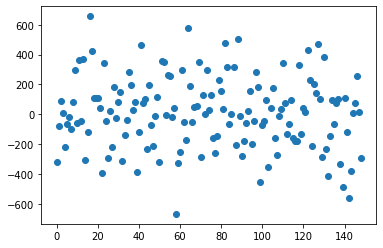

In [3]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#Train Simple Linear regression without regularization
model = LogisticRegression(penalty="none",solver="lbfgs")

#train logistic regression
model.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model.predict(X_val)

acc = metrics.accuracy_score(y_val, y_pred)
auc = metrics.roc_auc_score(y_val,y_pred)
precision = metrics.precision_score(y_val,y_pred)
recall = metrics.recall_score(y_val,y_pred)
mcc = metrics.matthews_corrcoef(y_val,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc)
print("ROC-AUC (Val):\t\t%.2f" % auc)
print("Precision (Val):\t%.2f" % precision)
print("Recall (Val):\t\t%.2f" % recall)
print("MCC (Val):\t\t%.2f" % mcc)

#Plot beta estimates
pl.scatter(np.arange(X.shape[1]),model.coef_)

# L2-Regularized Regression and Effect of Regularization
Note: This is just an example to see the effect of regularization. In this example we would optimize on our validation data. This means that the validation could not be used to validate the performance of the model. In the next example we will show how we can use cross-validation to find the optimal parameters on the training data.

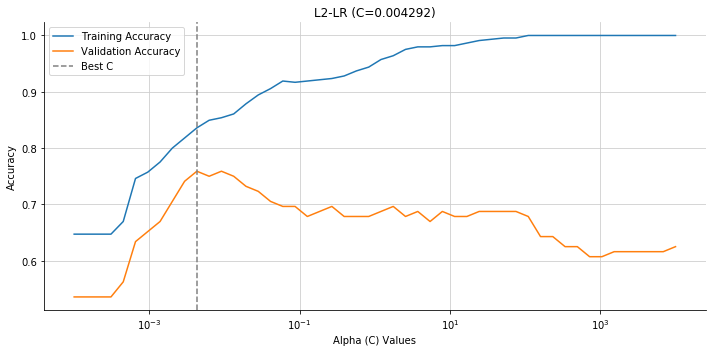

In [7]:
#create array of C values from 1**(-4) to 1**4 
Cs = np.logspace(-4,4,50)

train = []
val = []

for C in Cs:
    #Train Simple Linear regression without regularization
    lr = LogisticRegression(C=C, penalty="l2",solver="lbfgs",max_iter=4000)

    #train logistic regression
    lr.fit(X_train,y_train)

    #test logistic regression on validation data
    y_pred = lr.predict(X_val)
    acc = metrics.accuracy_score(y_val, y_pred)
    val.append(acc)
    #test lr on training data
    y_pred = lr.predict(X_train)
    acc = metrics.accuracy_score(y_train, y_pred)
    train.append(acc)

best_C = Cs[np.argmax(val)]

fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.plot(Cs,train,label="Training Accuracy")
ax.plot(Cs,val,label="Validation Accuracy")
ax.set_xscale("log")
ax.set_xlabel("Alpha (C) Values")
ax.set_ylabel("Accuracy")
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.axvline(best_C,color="grey",linestyle="dashed",label="Best C")
pl.title("L2-LR (C=%f)" % best_C)
pl.legend()
pl.tight_layout()

# L2 Regularized Regression with cross-validation to find optimal hyperparameters
Here we use the cross-validation on the training data to find the optimal hyperparameter $C$. The model with the best performance on the training data is then retrained internally with the best C value. After this we can use the validation data to get estimate of the performance of the model. 

Accuracy (Val):		0.70
ROC-AUC (Val):		0.68
Precision (Val):	0.75
Recall (Val):		0.52
MCC (Val):		0.39
Best C:			0.046416


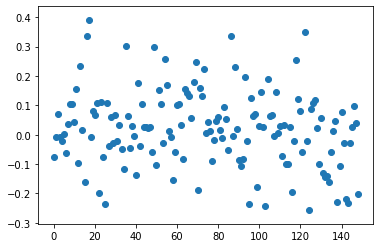

In [5]:
from sklearn.linear_model import LogisticRegressionCV

#Train Simple Linear regression without regularization
model2 = LogisticRegressionCV(Cs=10, penalty="l2",solver="lbfgs",cv=5,max_iter=4000)

#train logistic regression
model2.fit(X_train,y_train)

#test logistic regression on validation data
y_pred = model2.predict(X_val)

acc2 = metrics.accuracy_score(y_val, y_pred)
auc2 = metrics.roc_auc_score(y_val,y_pred)
precision2 = metrics.precision_score(y_val,y_pred)
recall2 = metrics.recall_score(y_val,y_pred)
mcc2 = metrics.matthews_corrcoef(y_val,y_pred)

print("Accuracy (Val):\t\t%.2f" % acc2)
print("ROC-AUC (Val):\t\t%.2f" % auc2)
print("Precision (Val):\t%.2f" % precision2)
print("Recall (Val):\t\t%.2f" % recall2)
print("MCC (Val):\t\t%.2f" % mcc2)
print("Best C:\t\t\t%f" %model2.C_)

#Plot beta estimates
pl.scatter(np.arange(X.shape[1]),model2.coef_)

# Plot ROC Curve for two models
ROC Curves and performance of simple logistic regresssion and l2-regularized logistic regression on the validation data. In the exercise we will extend this evaluation using l1-regularized logistic regression and elastic-net. Afterwards we will select the model that worked the best on the validation data, refit it with the best parameters on the full training data and estimate its performance an the never seen test data. This way we can estimate the generalization abilities of the model.

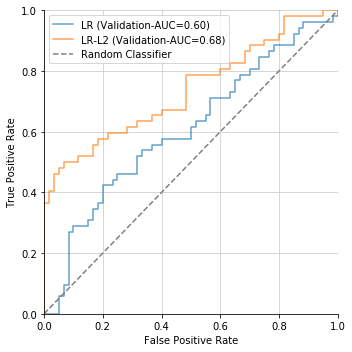

In [6]:
#for roc curve later
scores = model.decision_function(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, scores)

#plot roc curve later
scores = model2.decision_function(X_val)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_val, scores)

#generate roc plot
fig = pl.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(fpr,tpr,alpha=0.7,label="LR (Validation-AUC=%.2f)" % (auc))
ax.plot(fpr2,tpr2,alpha=0.7,label="LR-L2 (Validation-AUC=%.2f)" % (auc2))

ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
#Set axis labels
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
#Set axis limits
ax.set_ylim(0,1)
ax.set_xlim(0,1)
#show grid in grey and set top and right axis to invisible
ax.grid(color="#CCCCCC")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
pl.legend()
pl.tight_layout()